## Подготовка исходного распределения клеток

In [1]:
from scipy.signal import correlate2d
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

n = 50

locs = list(itertools.product(range(n), repeat=2))
np.random.shuffle(locs)

red_bound = int(n*n*0.45)
blue_bound = red_bound*2

red_locs = locs[:red_bound]
blue_locs = locs[red_bound:blue_bound]

red = np.zeros((n, n), dtype=np.uint8)
blue = np.zeros((n, n), dtype=np.uint8)

red[tuple(zip(*red_locs))] = 1
blue[tuple(zip(*blue_locs))] = 1

## Поиск несчастливых клеток

In [2]:
def step(red, blue):
    frame = [[1,1,1],
             [1,0,1],
             [1,1,1]
            ]
    cnt_for_happy = 3
    
    test_happy_red = correlate2d(red, frame, mode='same')
    test_happy_blue = correlate2d(blue, frame, mode='same')
    
    unhappy_red_locs = list(zip(*np.where((test_happy_red < cnt_for_happy) & red)))
    unhappy_blue_locs = list(zip(*np.where((test_happy_blue < cnt_for_happy) & blue)))
    
    total_unhappy = len(unhappy_red_locs) + len(unhappy_blue_locs)
    
    if total_unhappy > 0:
        i = np.random.randint(total_unhappy)

        empty_locs = list(zip(*np.where((red + blue) == 0)))
        j = np.random.randint(len(empty_locs))

        if i < len(unhappy_red_locs):
            red[unhappy_red_locs[i]] = 0
            red[empty_locs[j]] = 1      
        else:
            blue[unhappy_blue_locs[i - len(unhappy_red_locs)]] = 0
            blue[empty_locs[j]] = 1
            
    return total_unhappy

## Отображение

In [3]:
def plot_cells(red, blue):
    cmap = ListedColormap(["white", "red", "blue"])
    _, ax = plt.subplots()
    ax.imshow(red + 2*blue, cmap=cmap)
    plt.show()

## Итерации

0


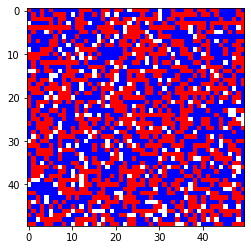

100


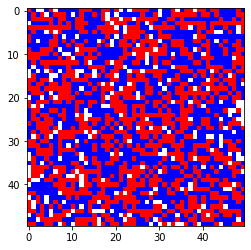

200


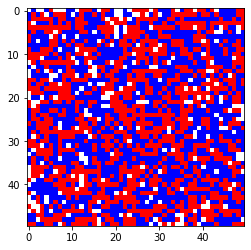

300


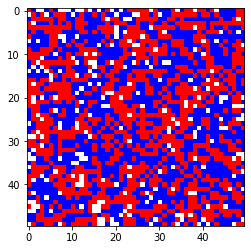

400


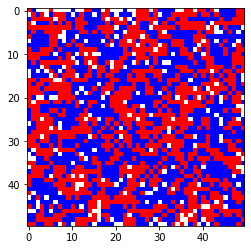

500


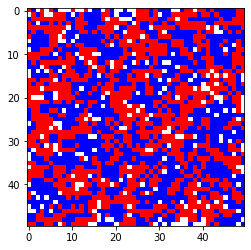

600


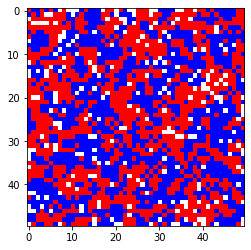

700


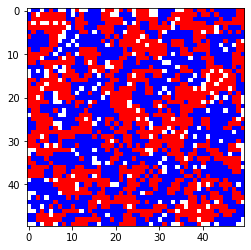

800


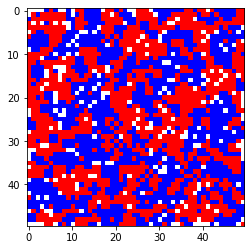

900


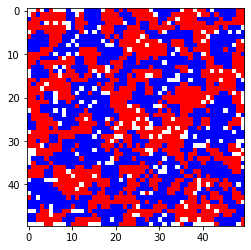

1000


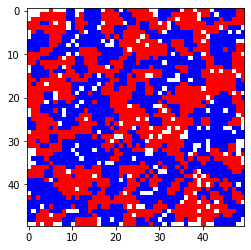

1100


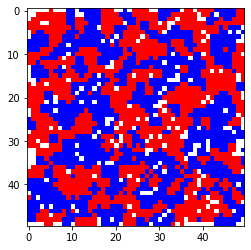

1200


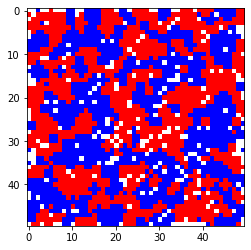

1300


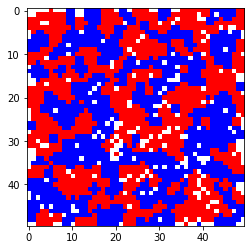

1316 final:


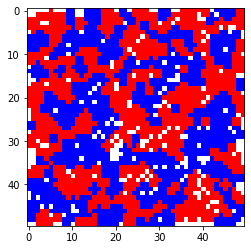

In [4]:
for i in range(10000):
    if i % 100 == 0:
        print(i)
        plot_cells(red, blue)
    if not step(red, blue):
        break
print(i, 'final:')
plot_cells(red, blue)